In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch

from trading_session_gym.envs.trading_session_gym import TradingSession
from train import DQN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
env = TradingSession(action_space_config = 'discrete')

net = DQN(env.observation_space.shape[0], env.action_space.n)
net.load_state_dict(torch.load('model.dat', map_location=lambda storage, loc: storage))

state = env.reset()

rewards = np.array(env.get_reward())
prices = np.array(env.get_prices())
holdings_quantity = np.array(env.get_holdings_quantity())

done = False

while done == False:
    state_v = torch.tensor(np.array([state], copy=False))
    q_vals = net(state_v).data.numpy()[0]
    action = np.argmax(q_vals)
    state, reward, done, _ = env.step(action)

    rewards = np.append(rewards, reward)
    prices = np.vstack([prices, env.get_prices()])
    holdings_quantity = np.vstack([holdings_quantity, env.get_holdings_quantity()])

c:\123\thesis\trading-session-gym\venv\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


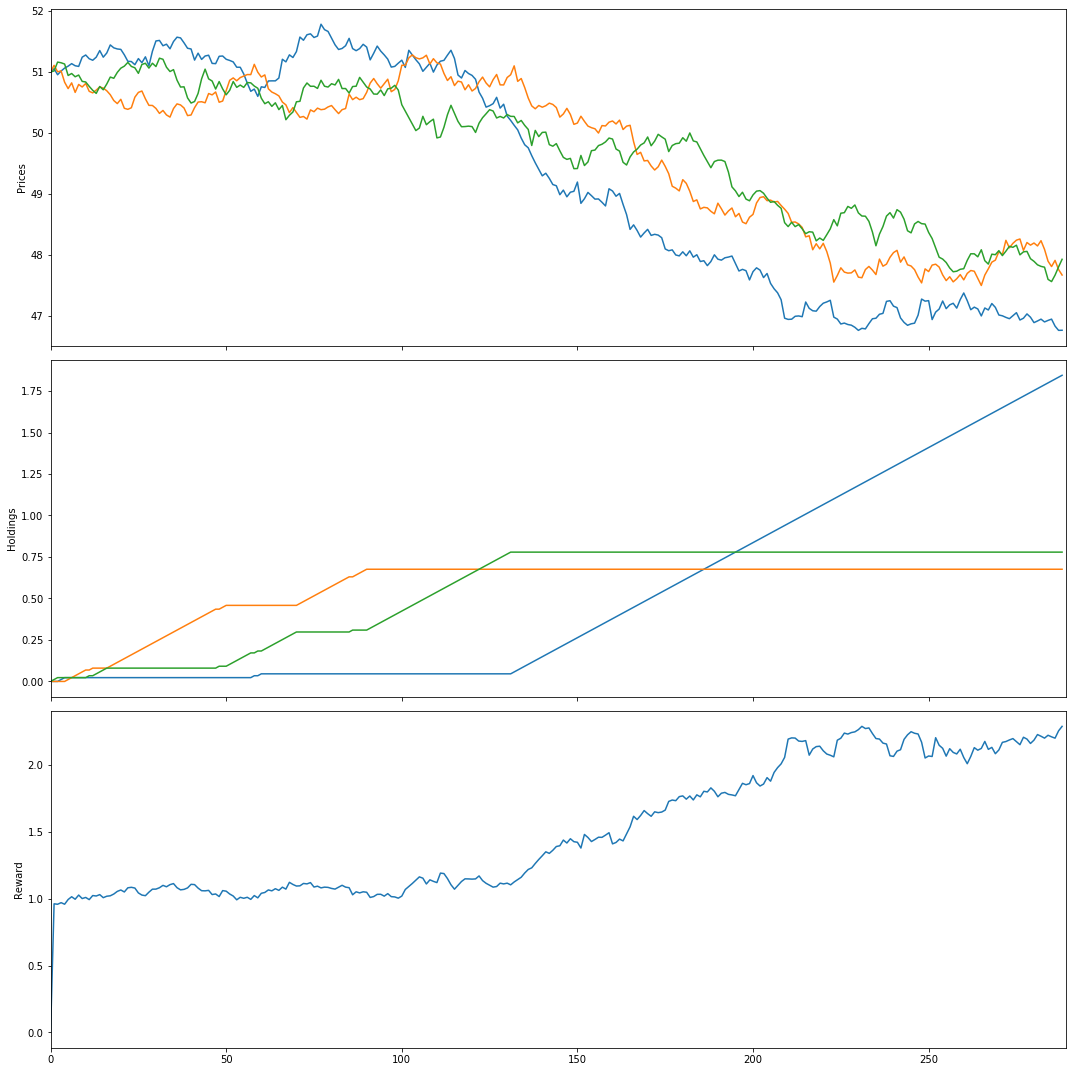

In [15]:
fig, axs = plt.subplots(3, figsize = [15,15], sharex = True)

axs[0].plot(prices)
axs[0].set_ylabel('Prices')

axs[1].plot(holdings_quantity)
axs[1].set_ylabel('Holdings')

axs[2].plot(rewards)
axs[2].set_ylabel('Reward')

axs[0].set_xlim([0, len(prices)])
plt.tight_layout()

In [16]:
optimal_strategy_reward = 1e19*env.get_boundary()/(np.min(prices))**10
naive_strategy_reward = np.add.accumulate(rewards)[-1]
naive_performance = naive_strategy_reward/optimal_strategy_reward

print("Performance: {}%". format(round(100*naive_performance, 2)))

Performance: 66.13%


In [17]:
optimal_strategy_reward

659.4901040573276

In [18]:
naive_strategy_reward

436.1030313392854